In [8]:
import numpy as np

# Use a pre-trained model

In [5]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import VGG16

In [3]:
# load the model
model = VGG16()

In [4]:
# load an image from file
image = load_img("data/dogs-vs-cats/train/dogs/dog.1006.jpg", target_size=(224, 224))

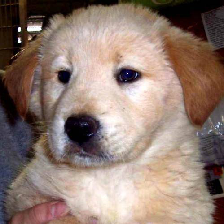

In [5]:
image

In [6]:
# convert the image pixels to a numpy array
image = img_to_array(image)

# reshape data for the model
image = np.expand_dims(image, axis=0)

# prepare the image for the VGG model
image = preprocess_input(image)

# predict the probability across all output classes
yhat = model.predict(image)

# convert the probabilities to class labels
label = decode_predictions(yhat)

# retrieve the most likely result, e.g. highest probability
label = label[0][0]

# print the classification
print('%s (%.2f%%)' % (label[1], label[2]*100))

golden_retriever (45.63%)


# Train a small convnet from scratch

In [12]:
# location of dogs and cats
train_data_dir = "data/dogs-vs-cats/train"
validation_data_dir = "data/dogs-vs-cats/validation"

In [17]:
!ls -l "data/dogs-vs-cats/train"

total 72
drwxrwxr-x 2 gilles gilles 36864 Feb  5 15:46 cats
drwxrwxr-x 2 gilles gilles 36864 Feb  5 15:47 dogs


In [20]:
!ls -l "data/dogs-vs-cats/train/dogs" 

total 25860
-rw-r--r-- 1 gilles gilles 23241 Sep 20  2013 dog.1000.jpg
-rw-r--r-- 1 gilles gilles 24211 Sep 20  2013 dog.1001.jpg
-rw-r--r-- 1 gilles gilles  6850 Sep 20  2013 dog.1002.jpg
-rw-r--r-- 1 gilles gilles  5815 Sep 20  2013 dog.1003.jpg
-rw-r--r-- 1 gilles gilles 10281 Sep 20  2013 dog.1004.jpg
-rw-r--r-- 1 gilles gilles 41599 Sep 20  2013 dog.1005.jpg
-rw-r--r-- 1 gilles gilles 31245 Sep 20  2013 dog.1006.jpg
-rw-r--r-- 1 gilles gilles 16480 Sep 20  2013 dog.1007.jpg
-rw-r--r-- 1 gilles gilles 14643 Sep 20  2013 dog.1008.jpg
ls: write error: Broken pipe


In [1]:
# data iterators
from keras.preprocessing.image import ImageDataGenerator

img_width, img_height = (150, 150)
batch_size = 32

train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode="binary")

validation_datagen = ImageDataGenerator(rescale=1. / 255)

validation_generator = validation_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode="binary")

Using TensorFlow backend.


Found 2000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [2]:
# convolutional network
from keras.models import Model 
from keras.layers import Input
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout

input_shape = (img_width, img_height, 3)

inputs = Input(shape=input_shape)
h = Conv2D(32, (3, 3), activation="relu")(inputs)
h = MaxPooling2D(pool_size=(2, 2))(h)
h = Conv2D(32, (3, 3), activation="relu")(h)
h = MaxPooling2D(pool_size=(2, 2))(h)
h = Conv2D(32, (3, 3), activation="relu")(h)
h = MaxPooling2D(pool_size=(2, 2))(h)
h = Flatten()(h)
h = Dense(64, activation="relu")(h)
h = Dropout(0.5)(h)
predictions = Dense(1, activation="sigmoid")(h)

model = Model(inputs=inputs, outputs=predictions)

model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [3]:
# train
nb_train_samples = 2000
nb_validation_samples = 2000
epochs = 10

model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size)

Epoch 1/10
62/62 [==============================] - 43s 688ms/step - loss: 0.7203 - acc: 0.5141 - val_loss: 0.7484 - val_acc: 0.4985
Epoch 2/10
62/62 [==============================] - 41s 658ms/step - loss: 0.6932 - acc: 0.5418 - val_loss: 0.6650 - val_acc: 0.5650
Epoch 3/10
62/62 [==============================] - 33s 532ms/step - loss: 0.6809 - acc: 0.6029 - val_loss: 0.6408 - val_acc: 0.6286
Epoch 4/10
62/62 [==============================] - 35s 558ms/step - loss: 0.6548 - acc: 0.6316 - val_loss: 0.6078 - val_acc: 0.6763
Epoch 5/10
62/62 [==============================] - 34s 546ms/step - loss: 0.6216 - acc: 0.6517 - val_loss: 0.5931 - val_acc: 0.6956
Epoch 6/10
62/62 [==============================] - 32s 524ms/step - loss: 0.6011 - acc: 0.6860 - val_loss: 0.6038 - val_acc: 0.6692
Epoch 7/10
62/62 [==============================] - 35s 567ms/step - loss: 0.5795 - acc: 0.6971 - val_loss: 0.5828 - val_acc: 0.6946
Epoch 8/10
62/62 [==============================] - 33s 539ms/step - 

Final accuracy at 71%.

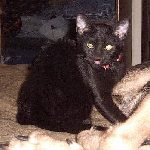

In [6]:
# sample prediction 1
img_path = "data/dogs-vs-cats/validation/cats/cat.2005.jpg"
image = load_img(img_path, target_size=(img_width, img_height))
image

In [9]:
image = img_to_array(image)
image = np.expand_dims(image, axis=0)
model.predict(image)

array([[0.]], dtype=float32)

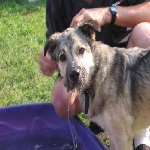

In [10]:
# sample prediction 2
img_path = "data/dogs-vs-cats/validation/dogs/dog.2004.jpg"
image = load_img(img_path, target_size=(img_width, img_height))
image

In [11]:
image = img_to_array(image)
image = np.expand_dims(image, axis=0)
model.predict(image)

array([[1.]], dtype=float32)

# Fine-tune the top layer of a pre-trained network

In [14]:
# location of dogs and cats
train_data_dir = "data/dogs-vs-cats/train"
validation_data_dir = "data/dogs-vs-cats/validation"

# data iterators
from keras.preprocessing.image import ImageDataGenerator

img_width, img_height = (224, 224)
batch_size = 32

def preprocess_input_vgg(x):
    X = np.expand_dims(x, axis=0)
    X = preprocess_input(X)
    return X[0]

train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input_vgg,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

train_generator = train_datagen.flow_from_directory(
    directory=train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode="binary")

validation_datagen = ImageDataGenerator(preprocessing_function=preprocess_input_vgg)

validation_generator = validation_datagen.flow_from_directory(
    directory=validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode="binary")

Found 2000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [15]:
# load vgg16 and fine-tune its top layer
from keras.applications import VGG16
from keras.layers import Dense
from keras.models import Model 

base_model = VGG16(weights="imagenet")
h = base_model.get_layer("fc2").output
predictions = Dense(1, activation="sigmoid", name="predictions")(h)

model = Model(inputs=base_model.input, outputs=predictions)

for layer in model.layers:
    if layer.name in ["predictions"]:
        continue
    layer.trainable = False
    
model.compile(optimizer="rmsprop", 
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [16]:
# train
nb_train_samples = 2000
nb_validation_samples = 2000
epochs = 5

model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size)

Epoch 1/5
62/62 [==============================] - 929s 15s/step - loss: 0.1065 - acc: 0.9607 - val_loss: 0.0569 - val_acc: 0.9778
Epoch 2/5
62/62 [==============================] - 926s 15s/step - loss: 0.0458 - acc: 0.9839 - val_loss: 0.0664 - val_acc: 0.9776
Epoch 3/5
62/62 [==============================] - 963s 16s/step - loss: 0.0272 - acc: 0.9899 - val_loss: 0.0558 - val_acc: 0.9822
Epoch 4/5
62/62 [==============================] - 996s 16s/step - loss: 0.0272 - acc: 0.9884 - val_loss: 0.0671 - val_acc: 0.9761
Epoch 5/5
62/62 [==============================] - 998s 16s/step - loss: 0.0163 - acc: 0.9950 - val_loss: 0.0615 - val_acc: 0.9812


Final accuracy at 98%!

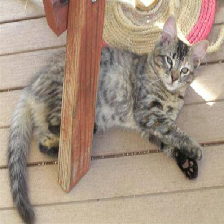

In [29]:
# sample prediction 1
img_path = "data/dogs-vs-cats/validation/cats/cat.2010.jpg"
image = load_img(img_path, target_size=(img_width, img_height))
image

In [30]:
image = img_to_array(image)
image = np.expand_dims(image, axis=0)
model.predict(image)

array([[2.3929078e-05]], dtype=float32)

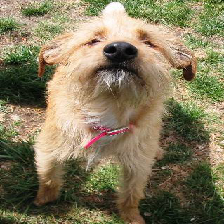

In [33]:
# sample prediction 2
img_path = "data/dogs-vs-cats/validation/dogs/dog.2012.jpg"
image = load_img(img_path, target_size=(img_width, img_height))
image

In [34]:
image = img_to_array(image)
image = np.expand_dims(image, axis=0)
model.predict(image)

array([[1.]], dtype=float32)